In [62]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
N = 1000

In [131]:
D = 10
dimensions = 1,10,20,100,500,1000,3000,6000,13000,20000
distances = []
angles = []
for d in dimensions:
    X = np.random.randn(N,d)

    # euclidean distance from center
    dist = np.linalg.norm(X, axis=1)

    # mean distance from center
    distances.append(dist)
    
    # angles between all samples
    tmp = cosine_similarity(X)
    # remove duplicates and norms
    nonzero = np.tril(tmp,-1)
    
    angles.append(np.arccos(nonzero[nonzero!=0]*(1-1e-12))/(2*np.pi)*360)

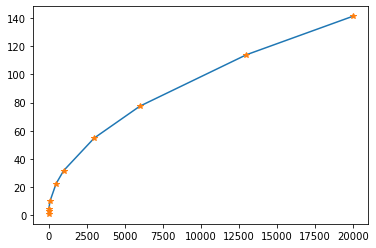

In [141]:
# the mean euclidean distance from the center (i.e. the L2 norm) is the square root of dimensionality
plt.plot(dimensions, [dist.mean() for dist in distances])
plt.plot(dimensions, np.sqrt(dimensions),'*')

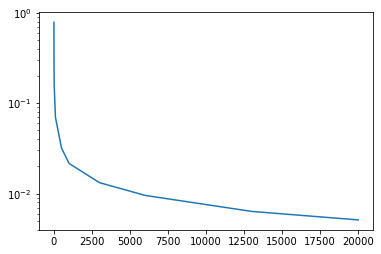

In [138]:
# norms tend to be the same in high dimensions
plt.plot(dimensions, [dist.std()/dist.mean() for dist in distances])
plt.yscale('log')

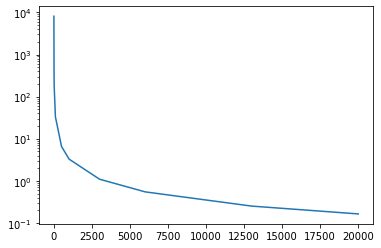

In [139]:
# angles tend to be orthogonal in high dimensions
plt.plot(dimensions, [angle.var(0) for angle in angles])
plt.yscale('log')

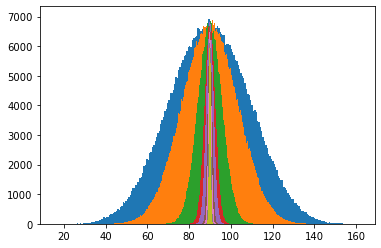

In [122]:
for i in range(1,len(angles)):
    plt.hist(angles[i],'auto');